In [14]:
import torch
import torch.nn as nn
import math

def get_data(t, time_len, sample, source_dataset):
        t = max(t, time_len-1)
        delta = sample[torch.randint(0, sample.size(0)-1, (1,))].item()
        t = t - max(0, (t + delta + time_len) - (source_dataset.size(0) - 1))
        next = t + delta + 1
        return (t-time_len+1, t+1), (next, next+time_len), delta

time_len = 24
max_lead_time = 24 * 7
sample = torch.arange(time_len, max_lead_time, step=time_len, dtype=torch.int32)
print(sample)
source_dataset = torch.zeros(1000)

print(get_data(999, time_len, sample, source_dataset))

tensor([ 24,  48,  72,  96, 120, 144], dtype=torch.int32)
((904, 928), (976, 1000), 48)


In [5]:
import torch

tensor = torch.tensor([1, 2, 3, 3, 3, 3, 8, 8, 8])

# Replace 3 with 1 and other numbers with 0
modified_tensor = (tensor == 3).float()

print(modified_tensor)

tensor([0., 0., 1., 1., 1., 1., 0., 0., 0.])


Text(0.5, 1.0, 'Sigmoid Function')

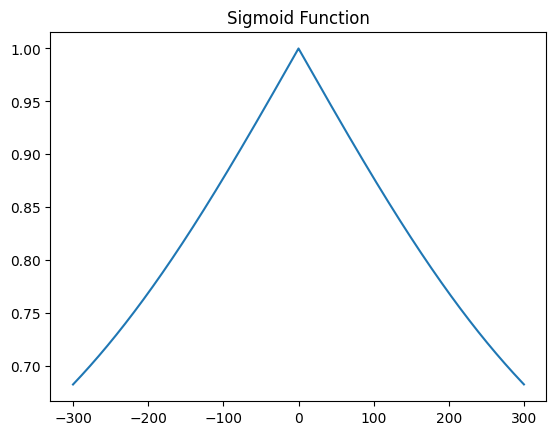

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid_function(x):
  x = x / 200
  return 1 - np.abs(1/(1+np.exp(-x)) - 0.5)

x = np.arange(-300, 300, 0.1)
sigmoid_y = sigmoid_function(x)
plt.plot(x, sigmoid_y)
plt.title("Sigmoid Function")

In [10]:
import torch

# Creating a dummy tensor for demonstration, replace this with your actual tensor
batch, time, var, hidden = 5, 10, 3, 4  # Example dimensions
tensor = torch.rand(batch, time, var, hidden)  # Random tensor for example

# Create a zeros tensor to insert
zeros_tensor = torch.zeros(batch, 1, var, hidden)

# Insert the zeros tensor at the first index of the time dimension
new_tensor = torch.cat((zeros_tensor, tensor[:, :-1, :, :]), dim=1)  # Removing last time index while concatenating

print(tensor)
print("--------")
print(new_tensor)

tensor([[[[8.1890e-02, 8.8884e-01, 1.6914e-01, 7.4296e-01],
          [2.9950e-01, 4.6841e-01, 6.7833e-01, 4.3450e-01],
          [2.6828e-01, 2.3228e-01, 7.9424e-01, 2.8804e-01]],

         [[5.7599e-01, 7.9061e-01, 3.4316e-01, 1.8674e-01],
          [1.6541e-01, 6.6050e-01, 7.1055e-01, 4.9033e-01],
          [8.3587e-01, 4.2750e-01, 7.1809e-01, 7.6841e-02]],

         [[3.4726e-01, 4.2610e-01, 4.3280e-01, 7.9391e-01],
          [5.9662e-01, 8.4239e-01, 9.8805e-01, 8.8960e-01],
          [3.6912e-01, 3.4132e-01, 1.9247e-01, 4.2013e-01]],

         [[1.8310e-01, 8.2774e-01, 9.4628e-01, 7.8454e-01],
          [7.6710e-02, 6.0990e-01, 4.3372e-01, 3.9776e-01],
          [1.9593e-01, 3.5578e-01, 8.8149e-01, 2.8150e-01]],

         [[9.8118e-01, 5.4203e-01, 8.1493e-03, 4.9602e-01],
          [4.8817e-01, 1.5491e-01, 7.5094e-01, 4.0846e-01],
          [7.4319e-01, 1.3771e-01, 1.0805e-01, 9.6939e-01]],

         [[2.2092e-01, 3.1865e-01, 1.7050e-01, 6.3920e-01],
          [9.8344e-01, 2.3785e

In [20]:
import torch
import math

def positional_encoding(batch, time_len, var_len, d_model, device, has_special_token=False):
    if has_special_token:
        time_len += 1
        
    pe = torch.zeros(batch, time_len, d_model, device=device).float()
    pe.require_grad = False
    position = torch.arange(0, time_len).float().unsqueeze(1)
    
    div_term = (torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model)).exp()

    pe[:, :, 0::2] = torch.sin(position * div_term)
    pe[:, :, 1::2] = torch.cos(position * div_term)

    if has_special_token:
        return torch.cat([pe[:, 1].unsqueeze(1), pe[:, 1:].repeat_interleave(var_len, dim=1)], dim=1)
    else:
        return pe.repeat_interleave(var_len, dim=1)

print(positional_encoding(1, 2, 48, 4, None, True).shape)

torch.Size([1, 97, 4])


In [15]:
import torch

zero = torch.rand(3, 6)
print(zero)
print(zero[:, -2:])

tensor([[0.2855, 0.7846, 0.0423, 0.4996, 0.3633, 0.9635],
        [0.8813, 0.6202, 0.8097, 0.2483, 0.4203, 0.9048],
        [0.3116, 0.8255, 0.1546, 0.2419, 0.2877, 0.9668]])
tensor([[0.3633, 0.9635],
        [0.4203, 0.9048],
        [0.2877, 0.9668]])
